In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

import hpcom
import pickle

import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go

In [2]:
data_dir = 'C:/Users/190243539/PycharmProjects/nn_essential/benchmark/data/'
job_name = 'benchmark_w_noise_1'

# n_channels = [1, 3, 7]
# z_km = [80 * k for k in range(1, 20 + 1)]  # 80, 160, 240 .. 1600

df = pd.read_pickle(data_dir + 'data_collected_' + job_name + '.pkl')

In [7]:
df.columns

Index(['run', 'n_channels', 'p_ave_dbm', 'z_km', 'points_x_orig', 'points_x',
       'points_x_shifted', 'points_y_orig', 'points_y', 'points_y_shifted',
       'ber_x', 'ber_y', 'q_x', 'q_y'],
      dtype='object')

In [8]:
df['ber_x_value'] = [k[0] for k in df['ber_x'].values]
df['ber_y_value'] = [k[0] for k in df['ber_y'].values]

In [13]:
df[(df.n_channels == 1)]

run  n_channels  p_ave_dbm  z_km  \
0       0           1      -20.0    80   
1       0           1      -20.0   160   
2       0           1      -20.0   240   
3       0           1      -20.0   320   
4       0           1      -20.0   400   
...   ...         ...        ...   ...   
1215    0           1       10.0  1280   
1216    0           1       10.0  1360   
1217    0           1       10.0  1440   
1218    0           1       10.0  1520   
1219    0           1       10.0  1600   

                                          points_x_orig  \
0     [[(-0.0007071067811865475-0.000707106781186547...   
1     [[(-0.0021213203435596424-0.000707106781186547...   
2     [[(-0.0007071067811865475-0.002121320343559642...   
3     [[(0.0021213203435596424+0.0021213203435596424...   
4     [[(0.0021213203435596424+0.0021213203435596424...   
...                                                 ...   
1215  [[(0.0670820393249937+0.0670820393249937j), (-...   
1216  [[(0.022360679774997897+0.0670820393249937j), ...   
1217  [[(0.0670820393249937+0.022360679774997897j), ...   
1218  [[(0.0670820393249937-0.022360679774997897j), ...   
1219  [[(-0.022360679774997897+0.0670820393249937j),...   

                                               points_x  \
0     [(-8.622393780037762e-09-6.99292114031057e-09j...   
1     [(-3.6734973323154126e-08-3.920692887384696e-0...   
2     [(-2.418959430493987e-08-1.6518326384848907e-0...   
3     [(1.0752620600014558e-09+2.2201103851551158e-0...   
4     [(4.2578547183148916e-08+4.724167832021966e-08...   
...                                                 ...   
1215  [(1.941814814770838e-06-1.0280574482822902e-06...   
1216  [(1.3464109828067374e-07+8.211547970408146e-07...   
1217  [(9.053133258531281e-07-5.683209900884286e-07j...   
1218  [(4.664702481732732e-07-6.022745738341543e-07j...   
1219  [(-4.325186497762605e-07+2.795563038075991e-07...   

                                       points_x_shifted  \
0     [(-0.0005804080732845471-0.0004707526052831268...   
1     [(-0.002470380663240239-0.00026167379126249777...   
2     [(-0.0016333607201887371-0.0011082196792388263...   
3     [(8.242175037277648e-05+0.0014900573842248515j...   
4     [(0.00288701108223702+0.003150531702106029j), ...   
...                                                 ...   
1215  [(0.17593603973532027+0.058491439200992444j), ...   
1216  [(-0.017917933586380337+0.06935565597136027j),...   
1217  [(0.08327536065800459-0.04061557981590157j), (...   
1218  [(0.026464534339030316-0.06175671145703344j), ...   
1219  [(-0.017479794495551815+0.04284673328736349j),...   

                                          points_y_orig  \
0     [[(-0.0007071067811865475-0.002121320343559642...   
1     [[(-0.0007071067811865475-0.000707106781186547...   
2     [[(0.0007071067811865475-0.0021213203435596424...   
3     [[(0.0007071067811865475+0.0021213203435596424...   
4     [[(-0.0007071067811865475-0.002121320343559642...   
...                                                 ...   
1215  [[(-0.0670820393249937+0.022360679774997897j),...   
1216  [[(0.0670820393249937+0.022360679774997897j), ...   
1217  [[(0.022360679774997897-0.0670820393249937j), ...   
1218  [[(0.022360679774997897-0.0670820393249937j), ...   
1219  [[(-0.0670820393249937-0.0670820393249937j), (...   

                                               points_y  \
0     [(-1.3500017174221282e-08-3.296596061949791e-0...   
1     [(-1.7265695001576483e-08-1.7565064451606173e-...   
2     [(1.5870288920047507e-08-2.4980921305796465e-0...   
3     [(2.483562846390971e-08+1.1107675720175736e-08...   
4     [(-3.235010774043195e-08-3.3344264315850766e-0...   
...                                                 ...   
1215  [(-6.234272813887307e-08+7.639730213424498e-07...   
1216  [(5.180287615262611e-07-5.373082069451207e-07j...   
1217  [(-1.0361718731716267e-06-6.388823335613358e-0...   
1218  [(-2.077715628461643e-07-8.695855976781284e-07...   
1219  [(-3.51401

0       1
1       1
2       1
3       1
4       1
       ..
3655    7
3656    7
3657    7
3658    7
3659    7
Name: n_channels, Length: 3660, dtype: int64

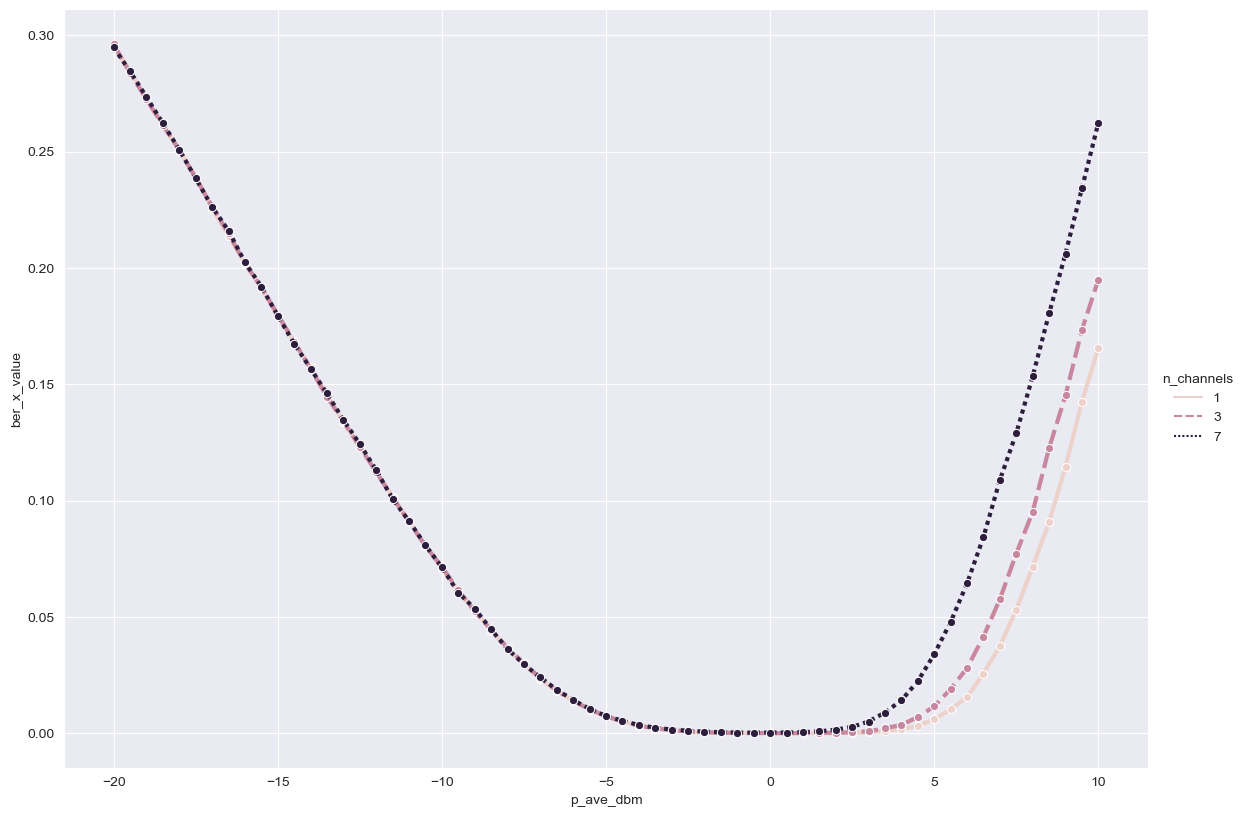

In [14]:
sns.relplot(
    data=df[(df.z_km == 960)],
    kind='line',
    marker="o",
    x="p_ave_dbm", y="ber_x_value",
    # col="time",
    hue="n_channels",
    style='n_channels',
    linewidth = 3,
    # style="smoker", size="size",
    height=8.27, aspect=11.7/8.27
)

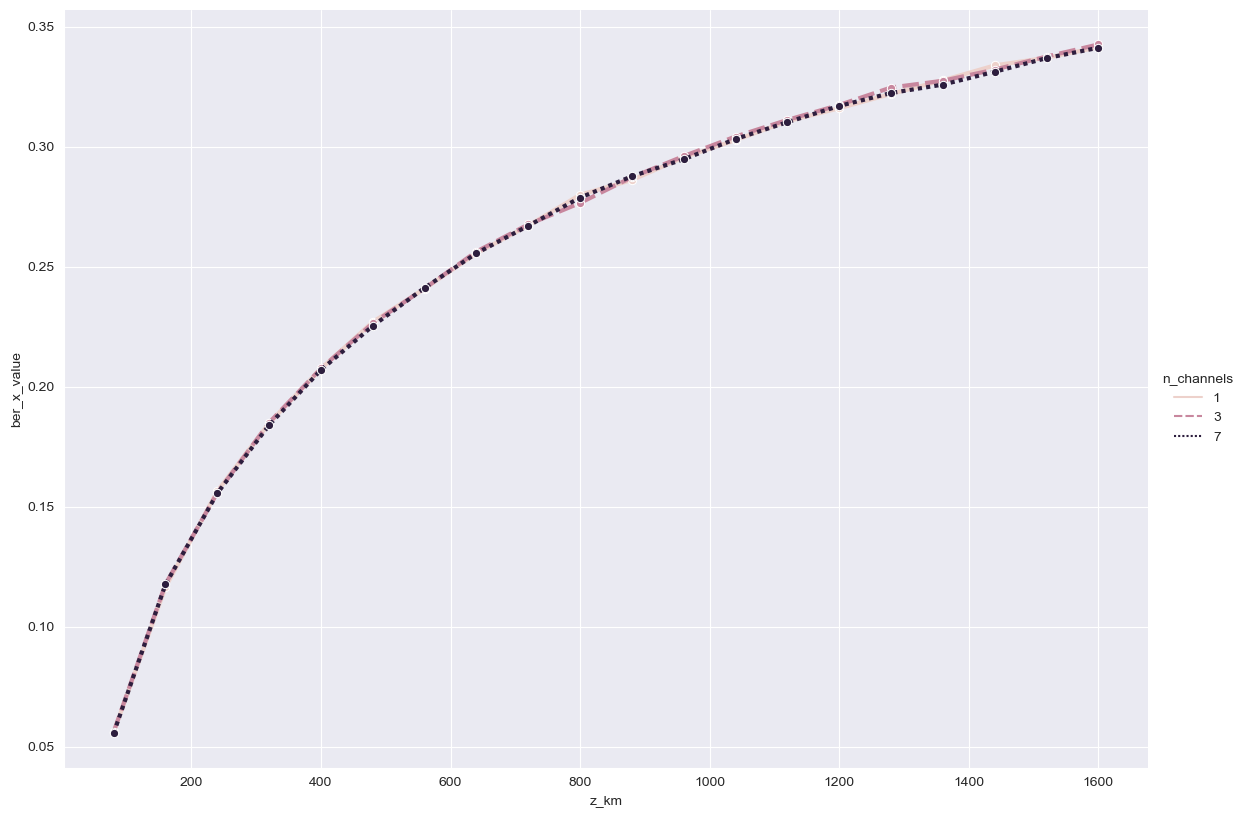

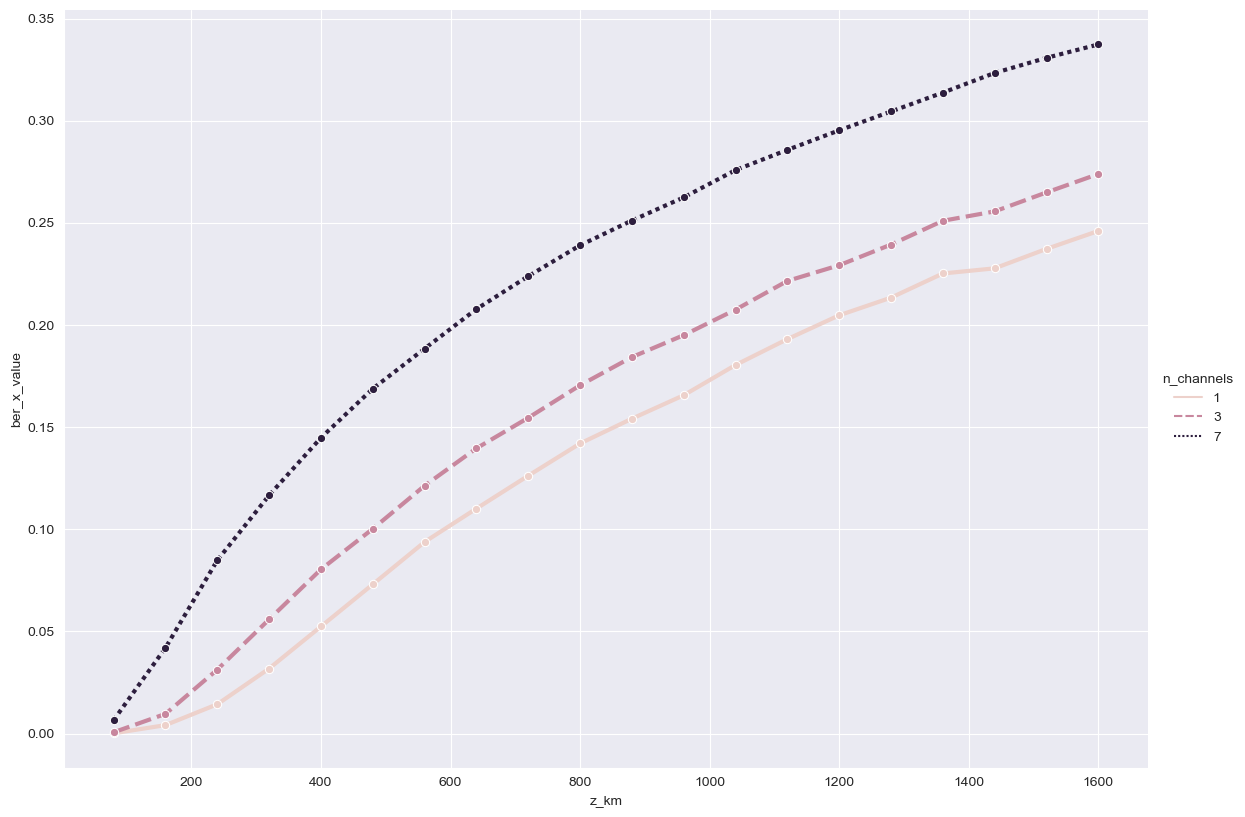

In [15]:
sns.relplot(
    data=df[(df.p_ave_dbm == -20)],
    kind='line',
    marker="o",
    x="z_km", y="ber_x_value",
    # col="time",
    hue="n_channels",
    style='n_channels',
    linewidth = 3,
    # style="smoker", size="size",
    height=8.27, aspect=11.7/8.27
)

sns.relplot(
    data=df[(df.p_ave_dbm == 10)],
    kind='line',
    marker="o",
    x="z_km", y="ber_x_value",
    # col="time",
    hue="n_channels",
    style='n_channels',
    linewidth = 3,
    # style="smoker", size="size",
    height=8.27, aspect=11.7/8.27
)

In [ ]:
color = ['xkcd:violet', 'xkcd:royal blue', 'xkcd:green blue', 'xkcd:terra cotta', 'xkcd:brick red']
color_add = ['xkcd:light purple', 'xkcd:azure', 'xkcd:aqua green', 'xkcd:tangerine', 'xkcd:light red']

fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))
k = 0
plot_range = slice(0, 8)
for p_ave_dbm in [5, 6, 7, 8]:
# for p_ave_dbm_train in [2, 3, 4, 5, 6]:
    df_plot = df[(df.p_ave_dbm == p_ave_dbm)]

    ber_orig = df_plot['ber_orig'].values
    ber_pred = df_plot['ber_pred'].values
    q_db_orig = df_plot['q_db_orig'].values
    q_db_pred = df_plot['q_db_pred'].values

    if k == 0:
        ax1.plot(p_test_list[plot_range], ber_orig[plot_range],
                 marker='o', linewidth=3,
                 markersize=10, label="Original",
                 color=color[1]
                )
    ax1.plot(p_test_list[plot_range], ber_pred[plot_range],
             marker='d', linewidth=3,
             linestyle='--',
             markersize=10, label=str(p_ave_dbm_train) + ' dBm train power',
             color=color_add[k]
            )

    k += 1

ax1.grid(True)
ax1.set_xlabel('Average power [dBm]')
# ax1.set_ylabel('BER', color=color)
ax1.set_ylabel('BER')
ax1.set_yscale('log')
# ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='y')


leg = plt.legend(fontsize=15, loc='lower right')
# leg.legendHandles[0].set_color('black')
# leg.legendHandles[1].set_color('black')

# plt.title(r'WDM 16-QAM | $20 \times 80$ km ', fontsize=20)

# plt.legend(fontsize=20)
fig.tight_layout()

fig.savefig('images/' + 'ber_different_models.pdf', format='pdf', bbox_inches='tight')